In [21]:
## Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
url = r'https://raw.githubusercontent.com/natthawit-jan/car_price_prediction_proj/master/Car_Purchasing_Data.csv'
df = pd.read_csv(url)

In [23]:
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


In [25]:
df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.224000,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.990339,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,41.000000,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.000000,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,52.000000,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [26]:
df['Customer Name Length'] = df['Customer Name'].apply(lambda d: len(d.replace(' ', '')))

In [8]:
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount,Customer Name Length
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877,12
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566,12
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921,14
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313,14
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248,11


<AxesSubplot:xlabel='Customer Name Length', ylabel='Car Purchase Amount'>

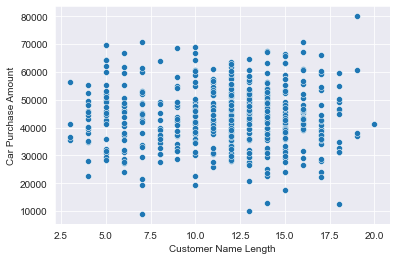

In [9]:
sns.scatterplot(data=df, x="Customer Name Length", y="Car Purchase Amount")

In [10]:
cols = [name for name in df.select_dtypes('number').columns if name != 'Car Purchase Amount']
P = df.corr(numeric_only=True).drop(columns=cols, index='Car Purchase Amount').T

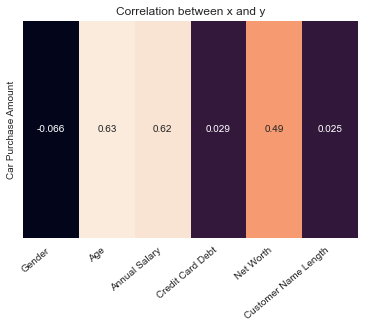

In [11]:
ax = sns.heatmap(P, annot=True, cbar=False)
ax.set_title('Correlation between x and y')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

In [12]:
## Drop Country column since only USA is present
if 'Country' in df.columns:
    df.drop(columns='Country', inplace=True)
if 'Customer Name' in df.columns:
    df.drop(columns='Customer Name', inplace=True)

In [27]:
## Extract only the email domain to see if there are any correlation
df['Customer domain name'] = df['Customer e-mail'].apply(lambda d: d.split('@')[1][d.split('@')[1].find('.')+1:])


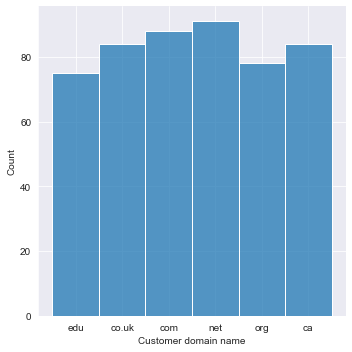

In [14]:
with sns.axes_style("darkgrid"):
    sns.displot(data=df, x="Customer domain name")

In [15]:
groupbydomainname =  df.groupby('Customer domain name')

In [16]:
groupbydomainname.mean()

/var/folders/p8/ysh15_5n5w78sss0_9ywmvyw0000gn/T/ipykernel_2147/3393795932.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupbydomainname.mean()


,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount,Customer Name Length
Customer domain name,,,,,,,
ca,0.488095,46.059524,61636.775366,9138.360017,433456.273527,43821.390665,11.761905
co.uk,0.583333,47.821429,64774.898773,10215.277454,439281.261096,47278.787549,11.833333
com,0.465909,45.443182,63358.102347,9628.929808,416878.308333,43823.184331,11.045455
edu,0.493333,45.693333,61257.195597,9209.385219,442804.722338,43584.621834,11.213333
net,0.538462,45.758242,60944.273414,9757.993721,437343.712367,43363.778117,12.043956
org,0.461538,46.615385,60632.148962,9642.177353,419666.420130,43347.358613,11.692308


In [17]:
def a(domain):
    return domain if domain == 'co.uk' else 'other'
df['co.uk'] = df['Customer domain name'].apply(a)

<AxesSubplot:xlabel='co.uk', ylabel='Car Purchase Amount'>

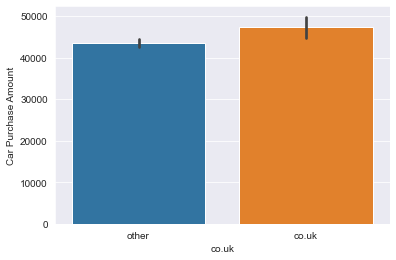

In [18]:
sns.barplot(data=df, y="Car Purchase Amount", x="co.uk")

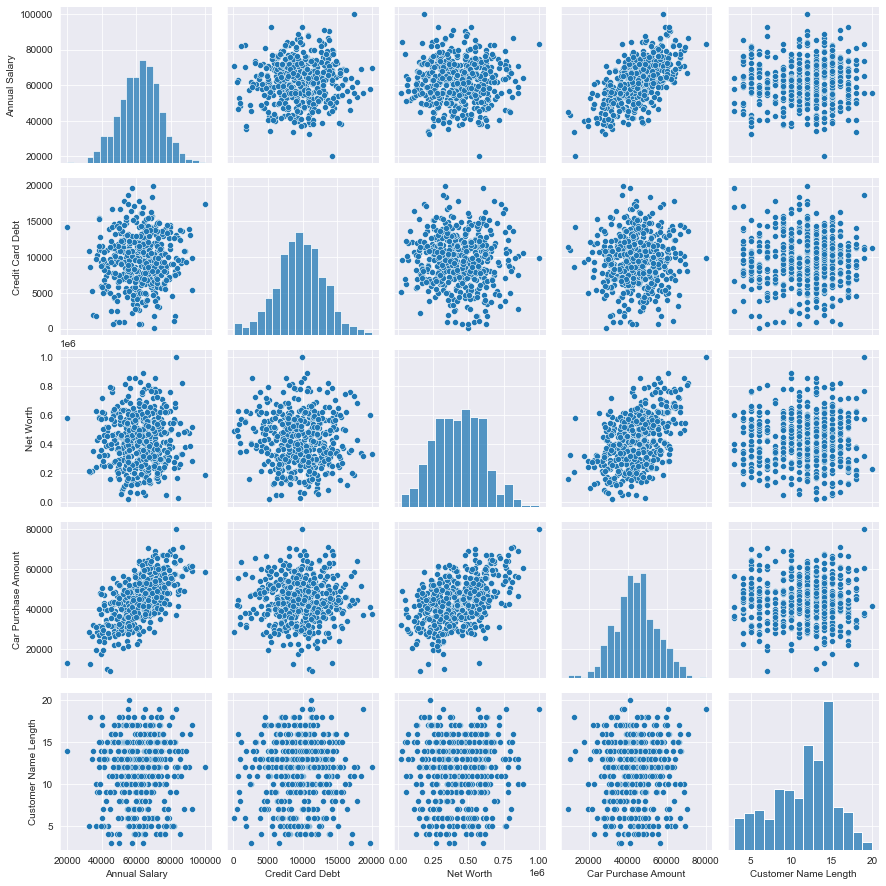

In [19]:
sns.pairplot(data=df.drop(columns=['Age', 'Gender']))

 Therefore looking from the plots, we can see that there are mainly 3 features that look linear and can be used to train the model. *Age*, *Net Worth* and *Annual Salary*

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Define X and y for the model

In [63]:
X = df[['Age', 'Annual Salary', 'Net Worth', 'Credit Card Debt']]
y = df['Car Purchase Amount']


Divide the data into train and test data. We'll use 70% for the train dataset and 30% for the test dataset.

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

Create a linear regression model and fit the data with the train dataset

In [65]:
model = LinearRegression()

In [66]:
model.fit(X_train, y_train)

LinearRegression()

See beta 0 (intercept value for the regression equation)

In [67]:
print(f'The intercept (b0) = {model.intercept_}')

The intercept (b0) = -42154.20449942348


See the rest of coefficients (b1, b2, b3)

In [68]:
Y = X_train.columns
for ind, coeff in enumerate(model.coef_):
    print(f'The value of b{ind+1, Y[ind]} = {coeff}')
    ind += 1


The value of b(1, 'Age') = 839.8166831270393
The value of b(2, 'Annual Salary') = 0.5636635870843423
The value of b(3, 'Net Worth') = 0.02888981131666067
The value of b(4, 'Credit Card Debt') = 0.0059612191236913786


Now, we test our model with the test data

In [69]:
y_pred = model.predict(X_test)

In [70]:
R_2_for_test_data = model.score(X_test, y_test)
print(f'R2 score for the test data is {R_2_for_test_data}')

R2 score for the test data is 0.9995228833344265


In [71]:
import statsmodels.api as sm

In [72]:
X_With_Constant = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, X_With_Constant).fit()
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Car Purchase Amount   R-squared:                       0.999
Model:                             OLS   Adj. R-squared:                  0.999
Method:                  Least Squares   F-statistic:                 1.673e+05
Date:                 Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                         14:21:50   Log-Likelihood:                -2418.3
No. Observations:                  350   AIC:                             4847.
Df Residuals:                      345   BIC:                             4866.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.215e+04    112.684   -374.091      0.000   -4.24e+04   -4.19e+04
Age                839.8167      1.665    504.418      0.000     836.542     843.091
Annual Salary        0.5637      0.001    480.860      0.000       0.561       0.566
Net Worth            0.0289   7.49e-05    385.614      0.000       0.029       0.029
Credit Card Debt     0.0060      0.004      1.656      0.099      -0.001       0.013
==============================================================================
Omnibus:                      221.520   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.669
Skew:                          -0.044   Prob(JB):                     1.97e-05
Kurtosis:                       1.784   Cond. No.                     4.06e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the summary above, we can say that credit card debt feature doesn't impact the car price that much, since the graph doens't look linear and the t score is close to 0 and p is greater than the alpha ( 0.05 ). It's not statistically significant for the model.

We create another model where we take out credit debt feature.

In [73]:
X = df[['Age', 'Annual Salary', 'Net Worth']]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [75]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [76]:
print(f'The intercept (b0) = {model.intercept_}')

The intercept (b0) = -42002.739826978475


In [77]:
Y = X_train.columns
for ind, coeff in enumerate(model.coef_):
    print(f'The value of b{ind+1, Y[ind]} = {coeff}')
    ind += 1

The value of b(1, 'Age') = 838.2043603795861
The value of b(2, 'Annual Salary') = 0.5624907726638958
The value of b(3, 'Net Worth') = 0.029018580322170685


In [79]:
y_pred = model.predict(X_test)
R_2_for_test_data = model.score(X_test, y_test)
print(f'R2 score for the test data is {R_2_for_test_data}')

R2 score for the test data is 0.999530157996528


In [80]:
import statsmodels.api as sm

In [81]:
X_With_Constant = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, X_With_Constant).fit()
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Car Purchase Amount   R-squared:                       0.999
Model:                             OLS   Adj. R-squared:                  0.999
Method:                  Least Squares   F-statistic:                 2.195e+05
Date:                 Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                         14:27:15   Log-Likelihood:                -2419.0
No. Observations:                  350   AIC:                             4846.
Df Residuals:                      346   BIC:                             4861.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -4.2e+04    108.905   -385.682      0.000   -4.22e+04   -4.18e+04
Age             838.2044      1.621    517.133      0.000     835.016     841.392
Annual Salary     0.5625      0.001    477.800      0.000       0.560       0.565
Net Worth         0.0290   7.54e-05    384.916      0.000       0.029       0.029
==============================================================================
Omnibus:                      223.323   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.888
Skew:                          -0.071   Prob(JB):                     1.77e-05
Kurtosis:                       1.783   Cond. No.                     3.92e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.92e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""